In [1]:
!python --version

Python 3.6.9


In [2]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [5]:
!apt install unixodbc-dev
!pip install pyodbc

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  unixodbc-dev
0 upgraded, 1 newly installed, 0 to remove and 52 not upgraded.
Need to get 37.1 kB of archives.
After this operation, 1,739 kB of additional disk space will be used.
Get:1 https://packages.microsoft.com/ubuntu/16.04/prod xenial/main amd64 unixodbc-dev amd64 2.3.7 [37.1 kB]
Fetched 37.1 kB in 0s (184 kB/s)
Selecting previously unselected package unixodbc-dev.
(Reading database ... 144605 files and directories currently installed.)
Preparing to unpack .../unixodbc-dev_2.3.7_amd64.deb ...
Unpacking unixodbc-dev (2.3.7) ...
Setting up unixodbc-dev (2.3.7) ...
     |████████████████████████████████| 276kB 4.6MB/s 
  Created wheel for pyodbc: filename=pyodbc-4.0.30-cp36-cp36m-linux_x86_64.whl size=272710 sha256=52eac37a2597ad337426e8b0c9a688c13caf5d27f9b4566949b6eac8ae97f884
  Stored in directory: /root/.cache/pip/wheels/4a/02/ba/6b495f

In [6]:
import pandas as pd 
import numpy as np
import pyodbc
import seaborn as sns 
import matplotlib.pyplot as plt 
import matplotlib as mpl

from IPython.display import set_matplotlib_formats

# 데이터 전처리
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
import os

from sklearn.preprocessing import Binarizer
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import GridSearchCV

In [445]:
server = 'daesangpoc.koreacentral.cloudapp.azure.com'  # 서버 주소 (DB 접속 ip)
database = 'daesang'  # 데이터베이스명
username = 'sa'  # 접속 유저
password = 'p@ssw0rd'   # 패스워드
cnxn = pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password)
cursor = cnxn.cursor()

In [8]:
SQL_query = pd.read_sql_query(
                              '''
                                 SELECT *
                                   FROM FST_ANAL_MART
                                  ORDER BY ITEM_CODE, SALE_DATE
                              ''', cnxn)

In [9]:
df = pd.DataFrame(SQL_query)

In [10]:
print(df.shape)
df.head()

(739325, 31)


,ITEM_CODE,LOCATION,SALE_DATE,SALE_START_DATE,SALE_SEQ,SO_BOX,PLAN_BOX,SO_LAG_W1,SO_LAG_W2,SO_LAG_W3,SO_LAG_M,SO_LAG_Y,FEATURE1,FEATURE2,FEATURE3_PL1,FEATURE3_PL2,FEATURE3_PL3,FEATURE4_GLOBAL,FEATURE5_GRADE,YYYYWW,WEEK_ORDER,YYYY,MM,WW,SEASON,CNT_PUBLIC,CNT_TRADITIONAL,LEAD_TRADITIONAL,CNT_MART,CNT_COMPANY,CNT_SCHOOL
0,1000020,HQ,2015-01-01,2015-01-01,1,0.0,26.0,NaN,NaN,NaN,NaN,NaN,RT,NON,370,370130,370130110,X,C,W201501,1,2015,1,1,WINTER,1,0,0,0,0,7
1,1000020,HQ,2015-01-05,2015-01-01,2,12.0,30.0,0.0,NaN,NaN,NaN,NaN,RT,NON,370,370130,370130110,X,C,W201502,2,2015,1,2,WINTER,0,0,0,1,0,7
2,1000020,HQ,2015-01-12,2015-01-01,3,122.0,0.0,12.0,0.0,NaN,NaN,NaN,RT,NON,370,370130,370130110,X,C,W201503,3,2015,1,3,WINTER,0,0,0,0,0,7
3,1000020,HQ,2015-01-19,2015-01-01,4,114.0,20.0,122.0,12.0,0.0,NaN,NaN,RT,NON,370,370130,370130110,X,C,W201504,4,2015,1,4,WINTER,0,0,0,1,0,7
4,1000020,HQ,2015-01-26,2015-01-01,5,0.0,0.0,114.0,122.0,12.0,0.0,NaN,RT,NON,370,370130,370130110,X,C,W201505,5,2015,1,5,WINTER,0,0,0,0,0,7


In [11]:
# unique한 ITEM_CODE 개수
len(df['ITEM_CODE'].unique())

4808

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 739325 entries, 0 to 739324
Data columns (total 31 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ITEM_CODE         739325 non-null  object 
 1   LOCATION          739325 non-null  object 
 2   SALE_DATE         739325 non-null  object 
 3   SALE_START_DATE   739325 non-null  object 
 4   SALE_SEQ          739325 non-null  int64  
 5   SO_BOX            739325 non-null  float64
 6   PLAN_BOX          739325 non-null  float64
 7   SO_LAG_W1         734517 non-null  float64
 8   SO_LAG_W2         729709 non-null  float64
 9   SO_LAG_W3         724901 non-null  float64
 10  SO_LAG_M          720093 non-null  float64
 11  SO_LAG_Y          517618 non-null  float64
 12  FEATURE1          739325 non-null  object 
 13  FEATURE2          739325 non-null  object 
 14  FEATURE3_PL1      739325 non-null  object 
 15  FEATURE3_PL2      739325 non-null  object 
 16  FEATURE3_PL3      73

In [13]:
# 데이터타입 변환
# SALE_DATE, SALE_START_DATE 날짜 타입으로 변환
df['SALE_DATE'] = pd.to_datetime(df['SALE_DATE'])
df['SALE_START_DATE'] = pd.to_datetime(df['SALE_START_DATE'])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 739325 entries, 0 to 739324
Data columns (total 31 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   ITEM_CODE         739325 non-null  object        
 1   LOCATION          739325 non-null  object        
 2   SALE_DATE         739325 non-null  datetime64[ns]
 3   SALE_START_DATE   739325 non-null  datetime64[ns]
 4   SALE_SEQ          739325 non-null  int64         
 5   SO_BOX            739325 non-null  float64       
 6   PLAN_BOX          739325 non-null  float64       
 7   SO_LAG_W1         734517 non-null  float64       
 8   SO_LAG_W2         729709 non-null  float64       
 9   SO_LAG_W3         724901 non-null  float64       
 10  SO_LAG_M          720093 non-null  float64       
 11  SO_LAG_Y          517618 non-null  float64       
 12  FEATURE1          739325 non-null  object        
 13  FEATURE2          739325 non-null  object        
 14  FEAT

In [15]:
df.head()

,ITEM_CODE,LOCATION,SALE_DATE,SALE_START_DATE,SALE_SEQ,SO_BOX,PLAN_BOX,SO_LAG_W1,SO_LAG_W2,SO_LAG_W3,SO_LAG_M,SO_LAG_Y,FEATURE1,FEATURE2,FEATURE3_PL1,FEATURE3_PL2,FEATURE3_PL3,FEATURE4_GLOBAL,FEATURE5_GRADE,YYYYWW,WEEK_ORDER,YYYY,MM,WW,SEASON,CNT_PUBLIC,CNT_TRADITIONAL,LEAD_TRADITIONAL,CNT_MART,CNT_COMPANY,CNT_SCHOOL
0,1000020,HQ,2015-01-01,2015-01-01,1,0.0,26.0,NaN,NaN,NaN,NaN,NaN,RT,NON,370,370130,370130110,X,C,W201501,1,2015,1,1,WINTER,1,0,0,0,0,7
1,1000020,HQ,2015-01-05,2015-01-01,2,12.0,30.0,0.0,NaN,NaN,NaN,NaN,RT,NON,370,370130,370130110,X,C,W201502,2,2015,1,2,WINTER,0,0,0,1,0,7
2,1000020,HQ,2015-01-12,2015-01-01,3,122.0,0.0,12.0,0.0,NaN,NaN,NaN,RT,NON,370,370130,370130110,X,C,W201503,3,2015,1,3,WINTER,0,0,0,0,0,7
3,1000020,HQ,2015-01-19,2015-01-01,4,114.0,20.0,122.0,12.0,0.0,NaN,NaN,RT,NON,370,370130,370130110,X,C,W201504,4,2015,1,4,WINTER,0,0,0,1,0,7
4,1000020,HQ,2015-01-26,2015-01-01,5,0.0,0.0,114.0,122.0,12.0,0.0,NaN,RT,NON,370,370130,370130110,X,C,W201505,5,2015,1,5,WINTER,0,0,0,0,0,7


In [17]:
import tensorflow as tf
from tensorflow import keras

# keras.io 예제 코드에서는 from keras.models import Sequential로 되어있지만, 앞에 tensorflow 넣어주어야 함
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [18]:
from tensorflow.python.keras.layers import Input, Dense, GRU, Embedding
from tensorflow.python.keras.optimizers import RMSprop
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard, ReduceLROnPlateau

In [19]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot

from pandas import read_csv
from pandas import DataFrame
from pandas import concat

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

In [20]:
keras.__version__

'2.4.0'

In [38]:
week_df = df[['YYYYWW','SALE_DATE','WEEK_ORDER','YYYY','MM','WW']].drop_duplicates()

In [40]:
week_df.tail(10)

,YYYYWW,SALE_DATE,WEEK_ORDER,YYYY,MM,WW
278,W202017,2020-04-27,279,2020,4,18
279,W202018,2020-05-04,280,2020,5,19
280,W202019,2020-05-11,281,2020,5,20
281,W202020,2020-05-18,282,2020,5,21
282,W202021,2020-05-25,283,2020,5,22
283,W202022,2020-06-01,284,2020,6,23
284,W202023,2020-06-08,285,2020,6,24
285,W202024,2020-06-15,286,2020,6,25
286,W202025,2020-06-22,287,2020,6,26
287,W202026,2020-06-29,288,2020,6,27


In [52]:
plan_week_id = 'W202018'
plan_week_order = week_df[week_df['YYYYWW']==plan_week_id]['WEEK_ORDER'].iloc[0]
yyyy = week_df[week_df['YYYYWW']==plan_week_id]['YYYY'].iloc[0]
mm = week_df[week_df['YYYYWW']==plan_week_id]['MM'].iloc[0]
fcst_week_order = week_df[(week_df['YYYY']==yyyy) & (week_df['MM']==mm)]['WEEK_ORDER'].to_list()

In [74]:
plan_week_order

280

In [56]:
fcst_week_order

[280, 281, 282, 283]

In [57]:
df_target = df[df['WEEK_ORDER']<=max(fcst_week_order)]

In [59]:
print(df_target.shape)
df_target.head()

(715285, 31)


,ITEM_CODE,LOCATION,SALE_DATE,SALE_START_DATE,SALE_SEQ,SO_BOX,PLAN_BOX,SO_LAG_W1,SO_LAG_W2,SO_LAG_W3,SO_LAG_M,SO_LAG_Y,FEATURE1,FEATURE2,FEATURE3_PL1,FEATURE3_PL2,FEATURE3_PL3,FEATURE4_GLOBAL,FEATURE5_GRADE,YYYYWW,WEEK_ORDER,YYYY,MM,WW,SEASON,CNT_PUBLIC,CNT_TRADITIONAL,LEAD_TRADITIONAL,CNT_MART,CNT_COMPANY,CNT_SCHOOL
0,1000020,HQ,2015-01-01,2015-01-01,1,0.0,26.0,NaN,NaN,NaN,NaN,NaN,RT,NON,370,370130,370130110,X,C,W201501,1,2015,1,1,WINTER,1,0,0,0,0,7
1,1000020,HQ,2015-01-05,2015-01-01,2,12.0,30.0,0.0,NaN,NaN,NaN,NaN,RT,NON,370,370130,370130110,X,C,W201502,2,2015,1,2,WINTER,0,0,0,1,0,7
2,1000020,HQ,2015-01-12,2015-01-01,3,122.0,0.0,12.0,0.0,NaN,NaN,NaN,RT,NON,370,370130,370130110,X,C,W201503,3,2015,1,3,WINTER,0,0,0,0,0,7
3,1000020,HQ,2015-01-19,2015-01-01,4,114.0,20.0,122.0,12.0,0.0,NaN,NaN,RT,NON,370,370130,370130110,X,C,W201504,4,2015,1,4,WINTER,0,0,0,1,0,7
4,1000020,HQ,2015-01-26,2015-01-01,5,0.0,0.0,114.0,122.0,12.0,0.0,NaN,RT,NON,370,370130,370130110,X,C,W201505,5,2015,1,5,WINTER,0,0,0,0,0,7


In [60]:
df_ts = df_target.pivot_table(index='ITEM_CODE', columns='WEEK_ORDER', values='SO_BOX').reset_index()

In [61]:
df_ts.columns = df_ts.columns.astype(str)

In [63]:
print(df_ts.shape)
df_ts.head()

(4808, 284)


WEEK_ORDER,ITEM_CODE,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283
0,1000020,0.0,12.0,122.0,114.0,0.0,78.0,2.0,0.0,109.0,0.0,124.0,20.0,32.0,125.0,4.0,179.0,32.0,46.0,0.0,1.0,2.0,167.0,22.0,0.0,12.0,11.0,87.0,0.0,0.0,0.0,22.0,10.0,167.0,33.0,12.0,140.0,154.0,0.0,0.0,...,0.0,12.0,0.0,115.0,0.0,87.0,52.0,60.0,133.0,100.0,8.0,0.0,127.0,0.0,213.0,20.0,62.0,108.0,116.0,20.0,47.0,25.0,151.0,76.0,40.0,125.0,137.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1000029,83.0,211.0,187.0,126.0,260.0,351.0,234.0,49.0,327.0,637.0,496.0,532.0,527.0,683.0,506.0,465.0,387.0,398.0,524.0,474.0,436.0,429.0,600.0,553.0,472.0,362.0,516.0,396.0,297.0,191.0,199.0,181.0,296.0,478.0,433.0,586.0,574.0,430.0,425.0,...,230.0,318.0,159.0,256.0,207.0,291.0,231.0,262.0,258.0,284.0,267.0,222.0,219.0,215.0,284.0,208.0,242.0,194.0,91.0,90.0,91.0,57.0,156.0,84.0,52.0,55.0,44.0,66.0,33.0,45.0,53.0,91.0,43.0,33.0,164.0,40.0,66.0,70.0,99.0,152.0
2,1000043,400.0,527.0,620.0,501.0,533.0,627.0,891.0,555.0,710.0,661.0,539.0,410.0,404.0,512.0,415.0,373.0,379.0,480.0,432.0,358.0,396.0,430.0,411.0,560.0,475.0,540.0,567.0,538.0,503.0,496.0,614.0,621.0,468.0,525.0,539.0,511.0,437.0,658.0,508.0,...,560.0,538.0,386.0,449.0,384.0,384.0,361.0,411.0,362.0,385.0,324.0,330.0,369.0,367.0,378.0,331.0,742.0,1025.0,537.0,506.0,582.0,735.0,583.0,462.0,444.0,379.0,673.0,609.0,565.0,564.0,395.0,546.0,601.0,503.0,616.0,555.0,576.0,359.0,411.0,421.0
3,1000138,1522.0,2956.0,2054.0,2151.0,2027.0,3274.0,2586.0,988.0,2754.0,3362.0,2354.0,2361.0,2397.0,3617.0,2367.0,2032.0,2116.0,3026.0,3296.0,2358.0,2438.0,2461.0,3703.0,2138.0,1831.0,2383.0,3406.0,2130.0,2042.0,2162.0,2059.0,3160.0,2379.0,2280.0,2086.0,3992.0,2591.0,2755.0,2613.0,...,1595.0,2990.0,1322.0,2055.0,1792.0,2700.0,2008.0,2233.0,2091.0,2574.0,2348.0,2026.0,1971.0,1489.0,3309.0,1961.0,1584.0,1450.0,2859.0,2336.0,2199.0,1432.0,1592.0,4157.0,3602.0,3263.0,2528.0,3222.0,1785.0,1029.0,1141.0,2031.0,1237.0,1274.0,1644.0,1838.0,2272.0,1834.0,2066.0,1475.0
4,1000163,2467.0,4226.0,3855.0,4046.0,5482.0,4804.0,4985.0,1368.0,6970.0,7103.0,5040.0,4528.0,5662.0,5657.0,4502.0,4292.0,4208.0,5748.0,3856.0,4126.0,3595.0,5224.0,4454.0,4034.0,2969.0,4796.0,5073.0,3524.0,3598.0,3372.0,4944.0,5000.0,2412.0,3697.0,5559.0,5512.0,3878.0,3092.0,3291.0,...,2461.0,2080.0,794.0,1532.0,3137.0,2367.0,1202.0,2335.0,1693.0,2856.0,1226.0,1676.0,1539.0,1387.0,1334.0,1774.0,1894.0,1681.0,1894.0,1770.0,1095.0,1675.0,1297.0,1565.0,1104.0,2303.0,1547.0,921.0,571.0,684.0,1237.0,1483.0,1427.0,897.0,656.0,1195.0,835.0,978.0,937.0,1753.0


In [ ]:
for index, row in df_ts.iterrows() :
  itemcode = row['ITEM_CODE']  # itemcode 저장
  series = row.iloc[1:]  # itemcode 제외한 수요실적 전체
  series = series.values.reshape(1, 283, 1)  # input으로 넣기 위한 데이터 변환
  train = series.[]
  X_train, Y_train = series[:, :plan_week_order-1], series[:, -len(fcst_week_order):, 0]
  X_test, Y_test = series[:, :plan_week_order-1], series[:, -len(fcst_week_order):, 0]

다시 시작

In [77]:
sample = df[df['ITEM_CODE']=='1000029']

In [79]:
fcst_week_order

[280, 281, 282, 283]

In [80]:
sample = sample[sample['WEEK_ORDER']<=max(fcst_week_order)]

In [82]:
# 5월 4주간의 SO_BOX를 예측함
# 과거 279개의 관측값으로 예측함 -- 모형을 학습하기 위해 279개의 관측값이 포함된 window를 만든다.
# history_size = 몇 개의 과거 데이터를 학습할 것인지 = 279
# target_size = 예측해야하는 레이블, 얼마나 멀리있는 예측을 배워야 하는가

def univariate_data(dataset, start_index, end_index, history_size, target_size) :
  data = []
  labels = []

  start_index = start_index + history_size
  if end_index is None :
    end_index = len(dataset) - target_size

  for i in range(start_index, end_index) :
    indices = range(i-history_size, i)

    # reshape data from (history_size, ) to (history_size, 1)
    data.append(np.reshape(dataset[indices], (history_size, 1)))
    labels.append(dataset[i+target_size])
  return np.array(data), np.array(labels)

In [83]:
# 데이터의 처음 200개 행은 train dataset이고 나머지는 validation dataset이다.
TRAIN_SPLIT = 200
tf.random.set_seed(13) # 재현성을 보장하기 위해 시드 설정

In [124]:
# univariate 시계열 예측
# 단일 특성(SO_BOX)만 사용하여 모델을 학습하고 향후 해당 값을 예측하는 데사용한다.
uni_data = sample['SO_BOX']
uni_data.index = sample['SALE_DATE']
uni_data.head()

SALE_DATE
2015-01-01     83.0
2015-01-05    211.0
2015-01-12    187.0
2015-01-19    126.0
2015-01-26    260.0
Name: SO_BOX, dtype: float64

In [125]:
uni_data.shape

(283,)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4c4c8613c8>],
      dtype=object)

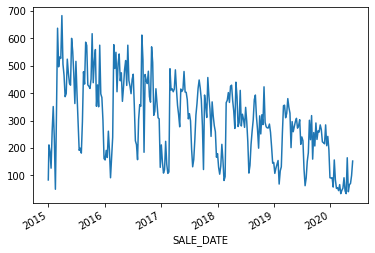

In [126]:
# 시간에 따른 데이터를 관찰함
uni_data.plot(subplots=True)

In [127]:
uni_data = uni_data.values

In [128]:
# 데이터 표준화 (평균을 빼고 각 피처의 표준편차로 나눔으로써 스케일링을 수행하는 방법)
# 평균 및 표준편차는 훈련 데이터만을 사용하여 계산해야 한다.

uni_train_mean = uni_data[:TRAIN_SPLIT].mean()
uni_train_std = uni_data[:TRAIN_SPLIT].std()

# 데이터 표준화
uni_data = (uni_data - uni_train_mean) / uni_train_std

In [129]:
# 모델에 마지막 20개의 SO_BOX가 제공되며 다음 단계에서 SO_BOX를 예측하는 방법을 배워야 한다.
univariate_past_history = 20
univariate_future_target = 0

x_train_uni, y_train_uni = univariate_data(uni_data, 0, TRAIN_SPLIT,
                                           univariate_past_history,
                                           univariate_future_target)
x_val_uni, y_val_uni = univariate_data(uni_data, TRAIN_SPLIT, None,
                                       univariate_past_history,
                                       univariate_future_target)

In [130]:
print('single window of past history')
print(x_train_uni[0])
print('\n target so_box to predict')
print(y_train_uni[0])

single window of past history
[[-1.9506371 ]
 [-1.00084423]
 [-1.1789304 ]
 [-1.63156606]
 [-0.63725165]
 [ 0.03799171]
 [-0.83017833]
 [-2.20292583]
 [-0.14009445]
 [ 2.16018515]
 [ 1.11392895]
 [ 1.38105819]
 [ 1.34395691]
 [ 2.50151697]
 [ 1.18813152]
 [ 0.88390099]
 [ 0.30512096]
 [ 0.38674378]
 [ 1.32169614]
 [ 0.9506833 ]]

 target so_box to predict
0.6687135408420002


In [131]:
def create_time_steps(length) :
  return list(range(-length, 0))

In [132]:
def show_plot(plot_data, delta, title) :
  labels = ['history', 'true future', 'model prediction']
  marker = ['.-', 'rx', 'go']
  time_steps = create_time_steps(plot_data[0].shape[0])
  if delta :
    future = delta
  else :
    future = 0
  
  plt.title(title)
  for i, x in enumerate(plot_data) :
    if i :
      plt.plot(future, plot_data[i], marker[i], markersize=10,
               label = labels[i])
    else :
      plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
    plt.legend()
    plt.xlim([time_steps[0], (future+5)*2])
    plt.xlabel('time-step')
    return plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

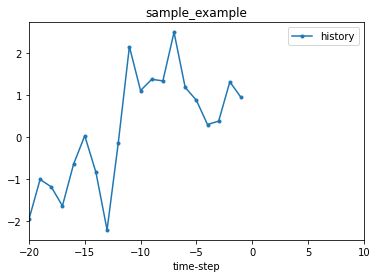

In [133]:
show_plot([x_train_uni[0], y_train_uni[0]], 0, 'sample_example')

In [134]:
# baseline - 모델 학습을 진행하기 전 기준 설정
# 입력 지점이 주어지면 모든 기록을 보고 다음 지점이 마지막 20개 관측치의 평균이 될 것으로 예측한다.

def baseline(history) :
  return np.mean(history)

In [135]:
baseline(x_train_uni[0])

0.20012432530524574

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

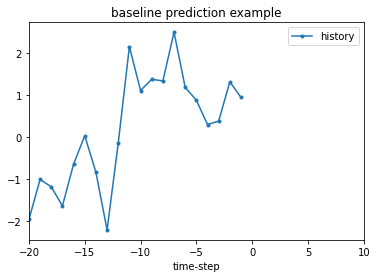

In [136]:
show_plot([x_train_uni[0], y_train_uni[0], baseline(x_train_uni[0])], 0,
          'baseline prediction example')

In [137]:
x_train_uni.shape

(180, 20, 1)

In [138]:
# RNN
BATCH_SIZE = 256
BUFFER_SIZE = 10000

train_univariate = tf.data.Dataset.from_tensor_slices((x_train_uni, y_train_uni))
train_univariate = train_univariate.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_univariate = tf.data.Dataset.from_tensor_slices((x_val_uni, y_val_uni))
val_univariate = val_univariate.batch(BATCH_SIZE).repeat()

In [139]:
simple_lstm_model = tf.keras.models.Sequential([
   tf.keras.layers.LSTM(8, input_shape=x_train_uni.shape[-2:]),
   tf.keras.layers.Dense(1)
])

In [140]:
simple_lstm_model.compile(optimizer='adam', loss='mae')

In [141]:
for x, y in val_univariate.take(1) :
  print(simple_lstm_model.predict(x).shape)

(63, 1)


In [142]:
EVALUATION_INTERVAL = 200
EPOCHS = 10

simple_lstm_model.fit(train_univariate, epochs=EPOCHS,
                       steps_per_epoch=EVALUATION_INTERVAL,
                       validation_data=val_univariate, validation_steps=50)

Epoch 1/10
200/200 [==============================] - 1s 5ms/step - loss: 0.6014 - val_loss: 0.9768
Epoch 2/10
200/200 [==============================] - 1s 4ms/step - loss: 0.4749 - val_loss: 0.7132
Epoch 3/10
200/200 [==============================] - 1s 4ms/step - loss: 0.4315 - val_loss: 0.4615
Epoch 4/10
200/200 [==============================] - 1s 4ms/step - loss: 0.3995 - val_loss: 0.4015
Epoch 5/10
200/200 [==============================] - 1s 4ms/step - loss: 0.3793 - val_loss: 0.3764
Epoch 6/10
200/200 [==============================] - 1s 5ms/step - loss: 0.3601 - val_loss: 0.3762
Epoch 7/10
200/200 [==============================] - 1s 4ms/step - loss: 0.3372 - val_loss: 0.4025
Epoch 8/10
200/200 [==============================] - 1s 4ms/step - loss: 0.3176 - val_loss: 0.4123
Epoch 9/10
200/200 [==============================] - 1s 4ms/step - loss: 0.3041 - val_loss: 0.4095
Epoch 10/10
200/200 [==============================] - 1s 4ms/step - loss: 0.2957 - val_loss: 0.4036

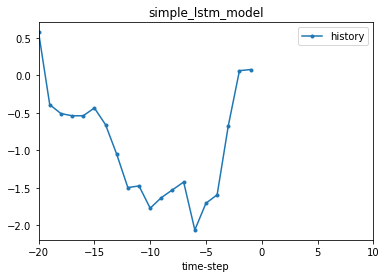

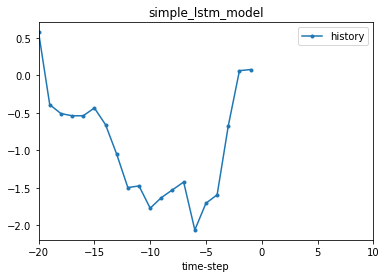

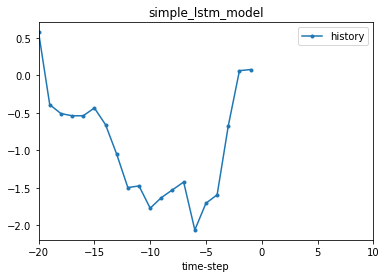

In [143]:
for x, y in val_univariate.take(3) :
  plot = show_plot([x[0].numpy(), y[0].numpy(),
                    simple_lstm_model.predict(x)[0]], 0, 'simple_lstm_model')
  plt.show()

In [144]:
# multi step
features_considered = ['SO_BOX','CNT_PUBLIC','CNT_TRADITIONAL']

In [145]:
features = sample[features_considered]
features.index = sample['SALE_DATE']
features.head()

,SO_BOX,CNT_PUBLIC,CNT_TRADITIONAL
SALE_DATE,,,
2015-01-01,83.0,1,0
2015-01-05,211.0,0,0
2015-01-12,187.0,0,0
2015-01-19,126.0,0,0
2015-01-26,260.0,0,0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4c4f5b6048>,
      dtype=object)

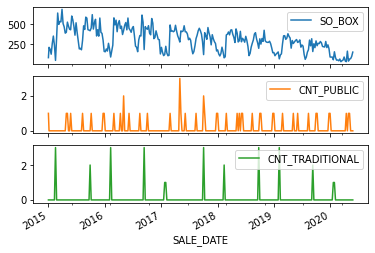

In [146]:
features.plot(subplots=True)

In [147]:
features

,SO_BOX,CNT_PUBLIC,CNT_TRADITIONAL
SALE_DATE,,,
2015-01-01,83.0,1,0
2015-01-05,211.0,0,0
2015-01-12,187.0,0,0
2015-01-19,126.0,0,0
2015-01-26,260.0,0,0
...,...,...,...
2020-04-27,40.0,1,0
2020-05-04,66.0,1,0
2020-05-11,70.0,0,0


In [148]:
# 데이터세트 표준화
dataset = features.values
data_mean = dataset[:TRAIN_SPLIT].mean(axis=0)
data_std = dataset[:TRAIN_SPLIT].std(axis=0)

dataset = (dataset-data_mean)/data_std

In [ ]:
past_history = 
future_target = 4
x_train_multi, y_train_multi = multivariate_data(dataset, dataset[:, 1], 0,
                                                 TRAIN_SPLIT, past_history,
                                                 future_target, STEP)

## **multivariate multi step model**

In [153]:
# 다시 시작
features = sample[['SO_BOX','CNT_PUBLIC','CNT_TRADITIONAL','LEAD_TRADITIONAL','CNT_MART','CNT_COMPANY','CNT_SCHOOL']]
features.index = sample['SALE_DATE']

In [157]:
values = features.values

In [164]:
values.shape

(283, 7)

In [161]:
# 데이터 minmax_scaling
scaler = MinMaxScaler()
scaled = scaler.fit_transform(values)

In [178]:
# t-1 시점 데이터와 t 시점 데이터를 하나의 행으로 가지는 데이터프레임을 reframed 변수로 선언함
# transform the data into a time series problem
# n_in = 3, n_out = 3 이라면 t-3, t-2, t-1, t, t+1, t+2 시점의 데이터가 하나의 행이 된다.
# n_in = 예측을 위해 과거 몇개의 시점을 사용할 것인지 (52개 구간)
# n_out = 향후 (앞의) 몇 개의 구간을 예측해야 하는지 (4개 구간)

def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
  n_vars = 1 if type(data) is list else data.shape[1]  # 변수의 개수
  df = DataFrame(data)  # 데이터 프레임으로 변환
  cols, names = list(), list()

  # input sequence (t-n, ... t-1)
  for i in range(n_in, 0, -1):  # n_in = 3 이면, i = 3, 2, 1
      cols.append(df.shift(i))   # lag 취하는 것
      names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]

  # forecast sequence (t, t+1, ... t+n)
  for i in range(0, n_out):
      cols.append(df.shift(-i))
      if i == 0:
          names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
      else:
          names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
  # put it all together
  agg = pd.concat(cols, axis=1)
  agg.columns = names
  # drop rows with NaN values
  if dropnan:
      agg.dropna(inplace=True)
  return agg

In [179]:
reframed = series_to_supervised(scaled, 52, 4)   # t-52시점, t시점 데이터를 한 행으로 둔다.

In [180]:
reframed

,var1(t-52),var2(t-52),var3(t-52),var4(t-52),var5(t-52),var6(t-52),var7(t-52),var1(t-51),var2(t-51),var3(t-51),var4(t-51),var5(t-51),var6(t-51),var7(t-51),var1(t-50),var2(t-50),var3(t-50),var4(t-50),var5(t-50),var6(t-50),var7(t-50),var1(t-49),var2(t-49),var3(t-49),var4(t-49),var5(t-49),var6(t-49),var7(t-49),var1(t-48),var2(t-48),var3(t-48),var4(t-48),var5(t-48),var6(t-48),var7(t-48),var1(t-47),var2(t-47),var3(t-47),var4(t-47),var5(t-47),...,var3(t-2),var4(t-2),var5(t-2),var6(t-2),var7(t-2),var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t),var7(t),var1(t+1),var2(t+1),var3(t+1),var4(t+1),var5(t+1),var6(t+1),var7(t+1),var1(t+2),var2(t+2),var3(t+2),var4(t+2),var5(t+2),var6(t+2),var7(t+2),var1(t+3),var2(t+3),var3(t+3),var4(t+3),var5(t+3),var6(t+3),var7(t+3)
52,0.076923,0.333333,0.0,0.0,0.0,0.0,1.0,0.273846,0.000000,0.0,0.0,1.0,0.0,1.0,0.236923,0.000000,0.0,0.0,0.0,0.0,1.0,0.143077,0.000000,0.0,0.0,1.0,0.0,1.0,0.349231,0.000000,0.0,0.0,0.0,0.0,1.000000,0.489231,0.000000,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.000000,0.410769,0.333333,0.0,0.0,0.0,0.0,0.285714,0.196923,0.333333,0.0,0.0,1.0,0.0,1.0,0.189231,0.000000,0.0,0.0,0.0,0.0,1.0,0.243077,0.000000,0.0,0.0,1.0,0.0,1.0,0.203077,0.000000,0.0,0.0,0.0,0.0,1.0
53,0.273846,0.000000,0.0,0.0,1.0,0.0,1.0,0.236923,0.000000,0.0,0.0,0.0,0.0,1.0,0.143077,0.000000,0.0,0.0,1.0,0.0,1.0,0.349231,0.000000,0.0,0.0,0.0,0.0,1.0,0.489231,0.000000,0.0,0.0,0.0,0.0,1.000000,0.309231,0.000000,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.285714,0.196923,0.333333,0.0,0.0,1.0,0.0,1.000000,0.189231,0.000000,0.0,0.0,0.0,0.0,1.0,0.243077,0.000000,0.0,0.0,1.0,0.0,1.0,0.203077,0.000000,0.0,0.0,0.0,0.0,1.0,0.350769,0.000000,0.0,0.0,1.0,0.0,1.0
54,0.236923,0.000000,0.0,0.0,0.0,0.0,1.0,0.143077,0.000000,0.0,0.0,1.0,0.0,1.0,0.349231,0.000000,0.0,0.0,0.0,0.0,1.0,0.489231,0.000000,0.0,0.0,0.0,0.0,1.0,0.309231,0.000000,0.0,1.0,1.0,0.0,1.000000,0.024615,0.000000,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.000000,0.189231,0.000000,0.0,0.0,0.0,0.0,1.000000,0.243077,0.000000,0.0,0.0,1.0,0.0,1.0,0.203077,0.000000,0.0,0.0,0.0,0.0,1.0,0.350769,0.000000,0.0,0.0,1.0,0.0,1.0,0.241538,0.000000,0.0,1.0,0.0,0.0,1.0
55,0.143077,0.000000,0.0,0.0,1.0,0.0,1.0,0.349231,0.000000,0.0,0.0,0.0,0.0,1.0,0.489231,0.000000,0.0,0.0,0.0,0.0,1.0,0.309231,0.000000,0.0,1.0,1.0,0.0,1.0,0.024615,0.000000,1.0,0.0,0.0,0.0,1.000000,0.452308,0.000000,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.000000,0.243077,0.000000,0.0,0.0,1.0,0.0,1.000000,0.203077,0.000000,0.0,0.0,0.0,0.0,1.0,0.350769,0.000000,0.0,0.0,1.0,0.0,1.0,0.241538,0.000000,0.0,1.0,0.0,0.0,1.0,0.089231,0.000000,1.0,0.0,1.0,0.0,1.0
56,0.349231,0.000000,0.0,0.0,0.0,0.0,1.0,0.489231,0.000000,0.0,0.0,0.0,0.0,1.0,0.309231,0.000000,0.0,1.0,1.0,0.0,1.0,0.024615,0.000000,1.0,0.0,0.0,0.0,1.0,0.452308,0.000000,0.0,0.0,1.0,0.0,0.857143,0.929231,0.000000,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.000000,0.203077,0.000000,0.0,0.0,0.0,0.0,1.000000,0.350769,0.000000,0.0,0.0,1.0,0.0,1.0,0.241538,0.000000,0.0,1.0,0.0,0.0,1.0,0.089231,0.000000,1.0,0.0,1.0,0.0,1.0,0.201538,0.000000,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,0.484615,0.000000,0.0,0.0,1.0,0.0,0.0,0.452308,0.000000,0.0,0.0,0.0,0.0,0.0,0.258462,0.000000,0.0,0.0,1.0,0.0,0.0,0.404615,0.000000,0.0,0.0,0.0,0.0,0.0,0.347692,0.333333,0.0,0.0,0.0,0.0,0.000000,0.375385,0.000000,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.000000,0.089231,0.000000,0.0,0.0,0.0,0.0,1.000000,0.015385,0.000000,0.0,0.0,0.0,0.0,1.0,0.000000,0.333333,0.0,0.0,1.0,0.0,1.0,0.201538,0.000000,0.0,0.0,0.0,0.0,1.0,0.010769,0.333333,0.0,0.0,1.0,0.0,1.0
276,0.452308,0.000000,0.0,0.0,0.0,0.0,0.0,0.258462,0.000000,0.0,0.0,1.0,0.0,0.0,0.404615,0.000000,0.0,0.0,0.0,0.0,0.0,0.347692,0

# **uni-variate multi-step**

*   multi variate = 설명 변수로 다수의 변수를 사용함
*   uni variate = SO_BOX만 사용하여 예측
*   multi step = 미래 여러 구간을 예측함 (forecast a sequence of future observations)

In [399]:
features = sample[['SO_BOX']]
features.index = sample['SALE_DATE']

In [400]:
features

,SO_BOX
SALE_DATE,
2015-01-01,83.0
2015-01-05,211.0
2015-01-12,187.0
2015-01-19,126.0
2015-01-26,260.0
...,...
2020-04-27,40.0
2020-05-04,66.0
2020-05-11,70.0


In [401]:
# series_to_supervised()  series 데이터를 지도 학습 문제로 변환하는 것
# 시계열 데이터는 input(x)과 output(y)의 시퀀스 (지도 학습)으로 변환되어야 한다.
# time series forecasting problem to supervised learning problem

# n_in  ==> t-1 (lagged observations), X 데이터 만드는 것
# n_out ==> t  (current time step), y 데이터 만드는 것

def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	"""
	Frame a time series as a supervised learning dataset.
	Arguments:
		data: Sequence of observations as a list or NumPy array.
		n_in: Number of lag observations as input (X). 
		n_out: Number of observations as output (y).
		dropnan: Boolean whether or not to drop rows with NaN values.
	Returns:
		Pandas DataFrame of series framed for supervised learning.
	"""
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [402]:
# 과거 3개월 (변경 가능) 데이터로 향후 4개구간 (한달)을 예측할 것
# n_in = 90 (t-1, t-2, ..., t-90)
# n_out = 4 (t, t+1, t+2, t+3)

# train / test 나누기
# transform series into train and test sets for supervised learning

# n_lag = n_in (90) 과거 학습 구간
# n_seq = n_out (4) 미래 예측 구간

# transform series into train and test sets for supervised learning
def prepare_data(series, n_lag, n_seq):
  # extract raw values
  raw_values = series.values
  raw_values = raw_values.reshape(len(raw_values), 1)
  # rescale values to 0, 1
  scaler = MinMaxScaler(feature_range=(0,1))
  scaled_values = scaler.fit_transform(raw_values)
  scaled_values = scaled_values.reshape(len(scaled_values), 1)
  # transform into supervised learning problem X, y
  supervised = series_to_supervised(scaled_values, n_lag, n_seq)
  supervised_values = supervised.values
  # split into train and test sets   # 전체 데이터의 80%를 학습 데이터로 사용
  n_test = int(round(supervised.shape[0] * 0.2))
  train, test = supervised_values[0:-n_test], supervised_values[-n_test:]
  return scaler, train, test

In [412]:
n_lag = 12
n_seq = 4

scaler, train, test = prepare_data(features, n_lag, n_seq)

In [413]:
print(test)

[[0.6        0.4        0.37538462 ... 0.36769231 0.38153846 0.41538462]
 [0.4        0.37538462 0.36923077 ... 0.38153846 0.41538462 0.27692308]
 [0.37538462 0.36923077 0.36923077 ... 0.41538462 0.27692308 0.31846154]
 ...
 [0.26769231 0.39692308 0.30461538 ... 0.01076923 0.05076923 0.05692308]
 [0.39692308 0.30461538 0.35230769 ... 0.05076923 0.05692308 0.10153846]
 [0.30461538 0.35230769 0.34615385 ... 0.05692308 0.10153846 0.18307692]]


In [414]:
print('train : %s, test : %s' % (train.shape, test.shape))

train : (200, 34), test : (50, 34)


In [415]:
n_valid = int(round(train.shape[0]) * 0.2)
train, valid = train[:-n_valid, :], train[:n_valid, :]
train = train.reshape(train.shape[0], train.shape[1], 1)
valid = valid.reshape(valid.shape[0], valid.shape[1], 1)
test = test.reshape(test.shape[0], test.shape[1], 1)

In [416]:
X_train, Y_train = train[:, :n_lag], train[:, -n_seq:, 0]
X_valid, Y_valid = valid[:, :n_lag], valid[:, -n_seq:, 0]
X_test, Y_test = test[:, :n_lag], test[:, -n_seq:, 0]

In [417]:
print(X_train.shape, Y_train.shape)

(160, 30, 1) (160, 4)


In [418]:
print(X_valid.shape, Y_valid.shape)

(40, 30, 1) (40, 4)


In [419]:
print(X_test.shape, Y_test.shape)

(50, 30, 1) (50, 4)


In [424]:
model = keras.models.Sequential([
    keras.layers.GRU(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.GRU(20),
    keras.layers.Dense(4)
])

In [425]:
optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss="mean_squared_error", optimizer=optimizer)

In [426]:
history = model.fit(X_train, Y_train, epochs=400, shuffle=False, validation_data=(X_valid, Y_valid))

Epoch 1/400
5/5 [==============================] - 1s 104ms/step - loss: 0.1976 - val_loss: 0.2272
Epoch 2/400
5/5 [==============================] - 0s 8ms/step - loss: 0.1459 - val_loss: 0.1671
Epoch 3/400
5/5 [==============================] - 0s 7ms/step - loss: 0.1019 - val_loss: 0.1151
Epoch 4/400
5/5 [==============================] - 0s 7ms/step - loss: 0.0673 - val_loss: 0.0755
Epoch 5/400
5/5 [==============================] - 0s 6ms/step - loss: 0.0468 - val_loss: 0.0545
Epoch 6/400
5/5 [==============================] - 0s 7ms/step - loss: 0.0410 - val_loss: 0.0494
Epoch 7/400
5/5 [==============================] - 0s 7ms/step - loss: 0.0407 - val_loss: 0.0503
Epoch 8/400
5/5 [==============================] - 0s 7ms/step - loss: 0.0396 - val_loss: 0.0517
Epoch 9/400
5/5 [==============================] - 0s 7ms/step - loss: 0.0380 - val_loss: 0.0523
Epoch 10/400
5/5 [==============================] - 0s 7ms/step - loss: 0.0371 - val_loss: 0.0524
Epoch 11/400
5/5 [=========

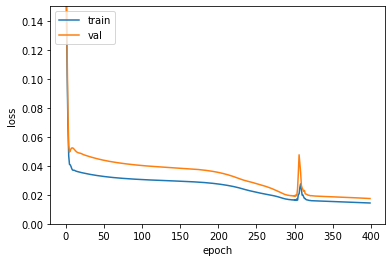

In [427]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylim(0.0, 0.15)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [428]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_2 (GRU)                  (None, None, 20)          1380      
_________________________________________________________________
gru_3 (GRU)                  (None, 20)                2520      
_________________________________________________________________
dense_12 (Dense)             (None, 4)                 84        
Total params: 3,984
Trainable params: 3,984
Non-trainable params: 0
_________________________________________________________________


In [429]:
mse_test = model.evaluate(X_test, Y_test)

2/2 [==============================] - 0s 3ms/step - loss: 0.0276


In [430]:
mse_test

0.02762529067695141

In [431]:
Y_pred = model.predict(X_test)

In [432]:
Y_pred.shape

(50, 4)

In [433]:
Y_pred_inv = scaler.inverse_transform(Y_pred)

In [434]:
Y_pred_inv.shape

(50, 4)

In [435]:
Y_test_inv = scaler.inverse_transform(Y_test)

In [436]:
Y_test_inv.shape

(50, 4)

In [439]:
def plot_results(predicted_data, true_data): 
    fig = plt.figure(facecolor='white') 
    ax = fig.add_subplot(111) 
    ax.plot(true_data, label='True Data') 
    plt.plot(predicted_data, label='Prediction') 
    plt.legend() 
    plt.show() 

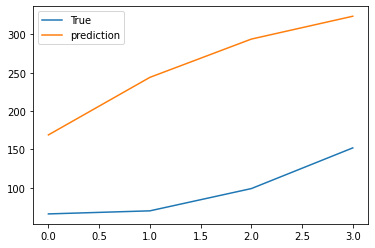

In [437]:
fig = plt.figure(facecolor = 'white')
ax = fig.add_subplot(111)
ax.plot(Y_test_inv[-1], label='True')
ax.plot(Y_pred_inv[-1], label='prediction')
ax.legend()
plt.show()

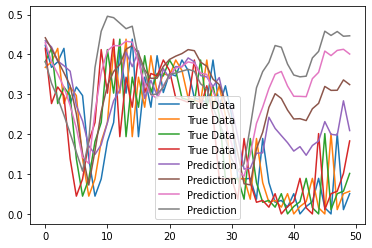

In [440]:
plot_results(Y_pred, Y_test)

In [441]:
rmse = sqrt(mean_squared_error(Y_test_inv, Y_pred_inv))

In [442]:
rmse

108.0355778320234

In [443]:
def MAPE(y, pred) :
  return np.mean(np.abs((y-pred)/y)*100)

In [444]:
MAPE(Y_test_inv, Y_pred_inv)

119.39919106154416

# **코드 최종 정리**

In [ ]:
# 코랩에서는 설치해주고 시작해야 함
!apt install unixodbc-dev
!pip install pyodbc

In [ ]:
import pandas as pd 
import numpy as np
import pyodbc
import seaborn as sns 
import matplotlib.pyplot as plt 
import matplotlib as mpl

from IPython.display import set_matplotlib_formats

# 데이터 전처리
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
import os

from sklearn.preprocessing import Binarizer
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import GridSearchCV

In [ ]:
import tensorflow as tf
from tensorflow import keras

# keras.io 예제 코드에서는 from keras.models import Sequential로 되어있지만, 앞에 tensorflow 넣어주어야 함
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

from tensorflow.python.keras.layers import Input, Dense, GRU, Embedding
from tensorflow.python.keras.optimizers import RMSprop
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard, ReduceLROnPlateau

from math import sqrt
from numpy import concatenate
from matplotlib import pyplot

from pandas import read_csv
from pandas import DataFrame
from pandas import concat

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

In [ ]:
server = 'daesangpoc.koreacentral.cloudapp.azure.com'  # 서버 주소 (DB 접속 ip)
database = 'daesang'  # 데이터베이스명
username = 'sa'  # 접속 유저
password = 'p@ssw0rd'   # 패스워드
cnxn = pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password)
cursor = cnxn.cursor()

In [ ]:
SQL_query = pd.read_sql_query(
                              '''
                                 SELECT *
                                   FROM FST_ANAL_MART
                                  ORDER BY ITEM_CODE, SALE_DATE
                              ''', cnxn)
df = pd.DataFrame(SQL_query)

In [ ]:
# 데이터타입 변환
# SALE_DATE, SALE_START_DATE 날짜 타입으로 변환
df['SALE_DATE'] = pd.to_datetime(df['SALE_DATE'])
df['SALE_START_DATE'] = pd.to_datetime(df['SALE_START_DATE'])

In [487]:
plan_week_id = 'W202018'
week_df = df[['YYYYWW','SALE_DATE','WEEK_ORDER','YYYY','MM','WW']].drop_duplicates()
plan_week_order = week_df[week_df['YYYYWW']==plan_week_id]['WEEK_ORDER'].iloc[0]   # 280
yyyy = week_df[week_df['YYYYWW']==plan_week_id]['YYYY'].iloc[0]
mm = week_df[week_df['YYYYWW']==plan_week_id]['MM'].iloc[0]
fcst_week_order = week_df[(week_df['YYYY']==yyyy) & (week_df['MM']==mm)]['WEEK_ORDER'].to_list()
train_week_start = plan_week_order - 12   # 예측 시점 기준 12주 전 시점   # 268
train_date_start = week_df[week_df['WEEK_ORDER']==train_week_start]['SALE_DATE'].iloc[0]  # 12주전 시점의 SALE_DATE

In [454]:
# 예측에 사용되는 구간만큼 데이터 필터링
df_target = df[df['WEEK_ORDER']<=max(fcst_week_order)]

In [455]:
item_code_list = df_target['ITEM_CODE'].unique().tolist()
n_item_code = len(item_code_list)

In [469]:
# series_to_supervised()  series 데이터를 지도 학습 문제로 변환하는 것
# 시계열 데이터는 input(x)과 output(y)의 시퀀스 (지도 학습)으로 변환되어야 한다.
# time series forecasting problem to supervised learning problem

# n_in  ==> t-1 (lagged observations), X 데이터 만드는 것
# n_out ==> t  (current time step), y 데이터 만드는 것

def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	"""
	Frame a time series as a supervised learning dataset.
	Arguments:
		data: Sequence of observations as a list or NumPy array.
		n_in: Number of lag observations as input (X). 
		n_out: Number of observations as output (y).
		dropnan: Boolean whether or not to drop rows with NaN values.
	Returns:
		Pandas DataFrame of series framed for supervised learning.
	"""
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [470]:
# 과거 3개월 (12주) (변경 가능) 데이터로 향후 4개구간 (한달)을 예측할 것
# n_in = 12 (t-1, t-2, ..., t-12)
# n_out = 4 (t, t+1, t+2, t+3)

# train / test 나누기
# transform series into train and test sets for supervised learning

# n_lag = n_in (12) 과거 학습 구간
# n_seq = n_out (4) 미래 예측 구간

# transform series into train and test sets for supervised learning
def prepare_data(series, n_lag, n_seq):
  # extract raw values
  raw_values = series.values
  raw_values = raw_values.reshape(len(raw_values), 1)
  # rescale values to 0, 1
  scaler = MinMaxScaler(feature_range=(0,1))
  scaled_values = scaler.fit_transform(raw_values)
  scaled_values = scaled_values.reshape(len(scaled_values), 1)
  # transform into supervised learning problem X, y
  supervised = series_to_supervised(scaled_values, n_lag, n_seq)
  supervised_values = supervised.values
  # split into train and test sets   # 전체 데이터의 80%를 학습 데이터로 사용
  n_test = int(round(supervised.shape[0] * 0.2))
  train, test = supervised_values[0:-n_test], supervised_values[-n_test:]
  return scaler, train, test

In [ ]:
ts_df = df_target.pivot_table(index='ITEM_CODE', values='SO_BOX', columns='WEEK_ORDER')
ts_df.columns = ts_df.columns.astype(str)
item_code = ts_df.reset_index(inplace=False)['ITEM_CODE']

model = keras.models.Sequential([
    keras.layers.GRU(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.GRU(20),
    keras.layers.Dense(4)
])

optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss="mean_squared_error", optimizer=optimizer)

forecast_dict = dict()
for index, row in ts_df.iterrows() :
  row = row.dropna()   # 결측치 열 제거 (수요실적이 있는 구간만 남음)
  
  if row.shape[0] >= 12 :   # 수요 구간이 12개 이상
    n_lag = 12
    n_seq = 4
    features = df_target[df_target['ITEM_CODE']==index][['SO_BOX']]
    features.index = df_target[df_target['ITEM_CODE']==index]['SALE_DATE']
    scaler, train, test = prepare_data(features, n_lag, n_seq)

    n_valid = int(round(train.shape[0]) * 0.2)
    train, valid = train[:-n_valid, :], train[:n_valid, :]
    train = train.reshape(train.shape[0], train.shape[1], 1)
    valid = valid.reshape(valid.shape[0], valid.shape[1], 1)
    test = test.reshape(test.shape[0], test.shape[1], 1)

    X_train, Y_train = train[:, :n_lag], train[:, -n_seq:, 0]
    X_valid, Y_valid = valid[:, :n_lag], valid[:, -n_seq:, 0]
    X_test, Y_test = test[:, :n_lag], test[:, -n_seq:, 0]

    history = model.fit(X_train, Y_train, epochs=350, shuffle=False, validation_data=(X_valid, Y_valid))

    Y_pred = model.predict(X_test)
    Y_pred_inv = scaler.inverse_transform(Y_pred)
    Y_test_inv = scaler.inverse_transform(Y_test)
    Y_pred_fin = Y_pred_inv[-1]
    Y_test_fin = Y_test_inv[-1]

    forecast_dict[index] = Y_pred_fin

  else :
    n_lag = row.shape[0]
    n_seq = 4
    features = df_target[df_target['ITEM_CODE']==index][['SO_BOX']]
    features.index = df_target[df_target['ITEM_CODE']==index]['SALE_DATE']
    scaler, train, test = prepare_data(features, n_lag, n_seq)

    n_valid = int(round(train.shape[0]) * 0.2)
    train, valid = train[:-n_valid, :], train[:n_valid, :]
    train = train.reshape(train.shape[0], train.shape[1], 1)
    valid = valid.reshape(valid.shape[0], valid.shape[1], 1)
    test = test.reshape(test.shape[0], test.shape[1], 1)

    X_train, Y_train = train[:, :n_lag], train[:, -n_seq:, 0]
    X_valid, Y_valid = valid[:, :n_lag], valid[:, -n_seq:, 0]
    X_test, Y_test = test[:, :n_lag], test[:, -n_seq:, 0]

    history = model.fit(X_train, Y_train, epochs=350, shuffle=False, validation_data=(X_valid, Y_valid))

    Y_pred = model.predict(X_test)
    Y_pred_inv = scaler.inverse_transform(Y_pred)
    Y_test_inv = scaler.inverse_transform(Y_test)
    Y_pred_fin = Y_pred_inv[-1]
    Y_test_fin = Y_test_inv[-1]

    forecast_dict[index] = Y_pred_fin    

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Epoch 152/350
6/6 [==============================] - 0s 7ms/step - loss: 0.0041 - val_loss: 0.0016
Epoch 153/350
6/6 [==============================] - 0s 10ms/step - loss: 0.0041 - val_loss: 0.0016
Epoch 154/350
6/6 [==============================] - 0s 8ms/step - loss: 0.0041 - val_loss: 0.0016
Epoch 155/350
6/6 [==============================] - 0s 10ms/step - loss: 0.0040 - val_loss: 0.0016
Epoch 156/350
6/6 [==============================] - 0s 7ms/step - loss: 0.0040 - val_loss: 0.0016
Epoch 157/350
6/6 [==============================] - 0s 7ms/step - loss: 0.0040 - val_loss: 0.0016
Epoch 158/350
6/6 [==============================] - 0s 8ms/step - loss: 0.0040 - val_loss: 0.0016
Epoch 159/350
6/6 [==============================] - 0s 8ms/step - loss: 0.0040 - val_loss: 0.0016
Epoch 160/350
6/6 [==============================] - 0s 8ms/step - loss: 0.0040 - val_loss: 0.0016
Epoch 161/350
6/6 [==============================] - 0s 7ms/step - loss

In [ ]:
df_result = pd.DataFrame(forecast_dict)

In [ ]:
forecast_dict

In [ ]:
df_result.to_csv('C:\\Users\\kimgy\\Documents\\daesang_poc\\df_result.csv')

In [ ]:
cursor.execute(
    '''
       INSERT INTO FST_RESULT
       (['PLAN_WEEK_ID', 'SCN_ID','ITEM_CODE','LOCATION','METHOD','FCST_WEEK_ORDER','FCST_BOX])
       values (?, ?, ?, ?, ?, ?, ?)
       ()
    '''

)